In [ ]:
# 1. Define the specific path
base_dir = '/content/Car-Bike-Dataset'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
# Count the files in the 'Bike' and 'Car' folders
total_bikes = len(os.listdir(os.path.join(base_dir, 'Bike')))
total_cars = len(os.listdir(os.path.join(base_dir, 'Car')))

In [ ]:
import os
base_dir = '/content/Car-Bike-Dataset'
print(f"Contents of '{base_dir}': {os.listdir(base_dir)}")

In [ ]:
import os
print(f"Training Bikes: {int(total_bikes * 0.8)}")
print(f"Testing Bikes : {int(total_bikes * 0.2)}")
print(f"Training Cars : {int(total_cars * 0.8)}")
print(f"Testing Cars : {int(total_cars * 0.2)}")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Define your path (Since you have one main folder)
data_dir = '/content/Car-Bike-Dataset'

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,       # Normalize pixel values
    validation_split=0.2  # Critical: This creates the split!
)

# Load and prepare training data
print("Loading Training Set:")
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224), # CHANGED to 224x224 for ResNet compatibility
    batch_size=32,
    class_mode='binary',
    subset='training'       # This grabs the training portion
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
print("Loading Validation Set:")
validation_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224), # Must match training size
    batch_size=32,
    class_mode='binary',
    subset='validation'     # This grabs the validation portion
)

Loading Training Set:
Found 1088 images belonging to 2 classes.
Loading Validation Set:
Found 271 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout
from keras.optimizers import Adam

# create CNN model - custom-made
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(train_data, epochs=20, validation_data=validation_data)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


34/34 ━━━━━━━━━━━━━━━━━━━━ 19s 218ms/step - accuracy: 0.5533 - loss: 1.0748 - val_accuracy: 0.7565 - val_loss: 0.5309
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.8737 - loss: 0.3747 - val_accuracy: 0.8782 - val_loss: 0.3054
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.9301 - loss: 0.1834 - val_accuracy: 0.8819 - val_loss: 0.2789
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 144ms/step - accuracy: 0.9338 - loss: 0.1522 - val_accuracy: 0.8635 - val_loss: 0.3294
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.9669 - loss: 0.0890 - val_accuracy: 0.9041 - val_loss: 0.3966
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.9897 - loss: 0.0385 - val_accuracy: 0.8930 - val_loss: 0.3626
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 139ms/step - accuracy: 0.9965 - loss: 0.0208 - val_accuracy: 0.8708 - val_loss: 0.4516
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.9993 - loss: 0.0120 - val_accuracy: 0.8598 - val

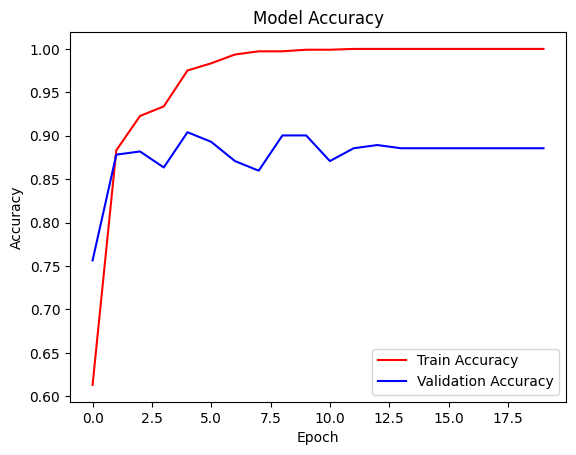

In [ ]:
import matplotlib.pyplot as plt

# 1. PLOT ACCURACY
plt.plot(history.history['accuracy'], color='red', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

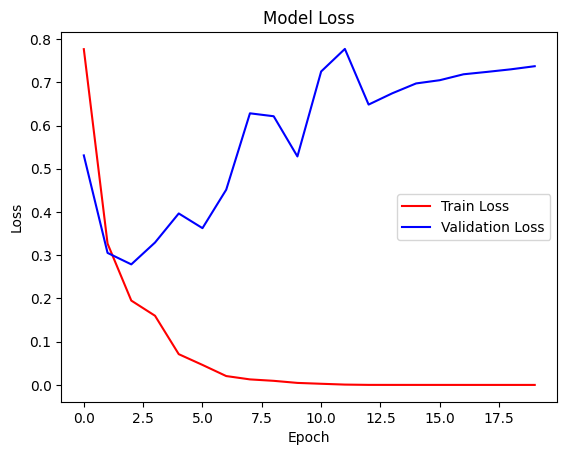

In [ ]:
# 2. PLOT LOSS
plt.plot(history.history['loss'], color='red', label='Train Loss')
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. Create the Generator (with split)
test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Critical: Tells it to prepare a 20% split
)

# 2. Load the Data
test_data = test_datagen.flow_from_directory(
    '/content/Car-Bike-Dataset', # Point to your main folder
    target_size=(224, 224),      # Must match your model input (ResNet uses 224)
    batch_size=32,
    class_mode='binary',
    subset='validation',         # Selects the 20% validation/test set
    shuffle=False                # IMPORTANT: Must be False for Confusion Matrix
)

Found 271 images belonging to 2 classes.


In [ ]:
#predict the test data
predictions = model.predict(test_data)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report


# 1. Get True Labels and Predicted Labels
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

# 2. Generate Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

# 3. Print Confusion Matrix
print("Confusion Matrix:")
print(cm)

# 4. Print Classification Report (With Class Names!)
# Note: The generator sorts folders alphabetically, so 0=Bike, 1=Car
print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['Bike', 'Car']))



Confusion Matrix:
[[142   7]
 [ 24  98]]

Classification Report:
              precision    recall  f1-score   support

        Bike       0.86      0.95      0.90       149
         Car       0.93      0.80      0.86       122

    accuracy                           0.89       271
   macro avg       0.89      0.88      0.88       271
weighted avg       0.89      0.89      0.88       271



There is overfitting and hence applying Batchnormalisation and Dropout techniques to handle overfitting

In [ ]:
model = Sequential()

# Conv Block 1
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(224,224,3)))
model.add(BatchNormalization())  # Helps training stability
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# Conv Block 2
model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# Conv Block 3
model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

# Flatten
model.add(Flatten())

# Dense Layers with Dropout (The "Solution to Overfitting")
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))  # Drops 10% of neurons to prevent memorization
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

# Output Layer
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


34/34 ━━━━━━━━━━━━━━━━━━━━ 12s 159ms/step - accuracy: 0.6576 - loss: 5.1881 - val_accuracy: 0.4428 - val_loss: 3.1057
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - accuracy: 0.8276 - loss: 1.5476 - val_accuracy: 0.5498 - val_loss: 20.8739
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - accuracy: 0.8790 - loss: 0.8630 - val_accuracy: 0.5424 - val_loss: 2.0169
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.9328 - loss: 0.4744 - val_accuracy: 0.5904 - val_loss: 1.5060
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.9389 - loss: 0.3851 - val_accuracy: 0.4576 - val_loss: 5.0393
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.9617 - loss: 0.1753 - val_accuracy: 0.6089 - val_loss: 3.0762
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.9760 - loss: 0.1232 - val_accuracy: 0.6347 - val_loss: 1.7522
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.9567 - loss: 0.3378 - val_accuracy: 0.5941 - va

In [ ]:
# 1. Prepare Test Data (using Validation split)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

test_data = test_datagen.flow_from_directory(
    '/content/Car-Bike-Dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 271 images belonging to 2 classes.


In [ ]:
predictions = model.predict(test_data)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
predicted_labels = (predictions > 0.5).astype(int)
true_labels = test_data.classes

# 3. Evaluation Metrics
cm = confusion_matrix(true_labels, predicted_labels)
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(true_labels, predicted_labels, target_names=['Bike', 'Car']))


Confusion Matrix:
[[123  26]
 [ 10 112]]

Classification Report:
              precision    recall  f1-score   support

        Bike       0.92      0.83      0.87       149
         Car       0.81      0.92      0.86       122

    accuracy                           0.87       271
   macro avg       0.87      0.87      0.87       271
weighted avg       0.87      0.87      0.87       271



Using Pre-trained model - Resnet

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define the ResNet50 Model
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(224, 224, 3),
    pooling='max',
    weights='imagenet'
)

for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from keras.optimizers import Adam
resnet_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


34/34 ━━━━━━━━━━━━━━━━━━━━ 26s 391ms/step - accuracy: 0.5861 - loss: 1.9188 - val_accuracy: 0.8376 - val_loss: 0.3919
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.8319 - loss: 0.3917 - val_accuracy: 0.5793 - val_loss: 1.1793
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.7623 - loss: 0.5324 - val_accuracy: 0.8561 - val_loss: 0.3513
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - accuracy: 0.8749 - loss: 0.3020 - val_accuracy: 0.7786 - val_loss: 0.4628
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - accuracy: 0.8628 - loss: 0.3060 - val_accuracy: 0.8487 - val_loss: 0.3458
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 132ms/step - accuracy: 0.9131 - loss: 0.2399 - val_accuracy: 0.8708 - val_loss: 0.3222
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - accuracy: 0.9098 - loss: 0.2397 - val_accuracy: 0.8376 - val_loss: 0.3442
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.9075 - loss: 0.2255 - val_accuracy: 0.8303 - val

In [ ]:
predictions = resnet_model.predict(test_data)

9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 622ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

predicted_labels = (predictions > 0.5).astype(int)
true_labels = test_data.classes

# 2. Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("\nConfusion Matrix:")
print(cm)

# 3. Classification Report
# This output goes into your "Result Evaluation" section
print("\nClassification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels, target_names=['Bike', 'Car']))



Confusion Matrix:
[[148   1]
 [ 66  56]]

Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

        Bike       0.69      0.99      0.82       149
         Car       0.98      0.46      0.63       122

    accuracy                           0.75       271
   macro avg       0.84      0.73      0.72       271
weighted avg       0.82      0.75      0.73       271

